In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('content/ola.csv')
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137


In [3]:
df.shape

(10886, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   weather     10886 non-null  int64  
 3   temp        9254 non-null   float64
 4   humidity    9254 non-null   float64
 5   windspeed   9254 non-null   float64
 6   casual      10886 non-null  int64  
 7   registered  10886 non-null  int64  
 8   count       10886 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 765.6+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.493937,1.120531,1.000000,1.000000,2.000000,3.000000,4.000000
weather,10886.0,2.491916,1.123139,1.000000,1.000000,2.000000,4.000000,4.000000
temp,9254.0,23.240116,20.311144,-22.743852,12.470555,20.743790,29.394576,211.102548
humidity,9254.0,124.452421,75.568291,32.713561,87.846187,112.180064,137.301002,672.687236
windspeed,9254.0,34.549616,28.417263,-1.407737,17.963252,30.945593,44.029018,244.921965
casual,10886.0,24.517545,14.390014,0.000000,12.000000,25.000000,37.000000,49.000000
registered,10886.0,99.551442,57.541131,0.000000,50.000000,100.000000,149.000000,199.000000
count,10886.0,224.177267,75.228602,-12.769738,170.140221,224.257587,278.407366,464.839068


In [6]:
parts = df["datetime"].str.split(" ", n=2, expand=True)
df["date"] = parts[0]
df["time"] = parts[1].str[:2].astype('int')
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778,2011-01-01,0
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093,2011-01-01,1
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2011-01-01,2
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549,2011-01-01,3
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137,2011-01-01,4


In [7]:
parts = df["date"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778,2011-01-01,0,2011,1,1
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093,2011-01-01,1,2011,1,1
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2011-01-01,2,2011,1,1
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549,2011-01-01,3,2011,1,1
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137,2011-01-01,4,2011,1,1


In [8]:
from datetime import datetime

df['datetime'] = pd.to_datetime(df['datetime'])

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

def weekend_or_weekday(year, month, day):
    try:
        d = datetime(year, month, day)
        return 0 if d.weekday() > 4 else 1
    except ValueError:
        return np.nan

df['weekday'] = df.apply(lambda x: weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)

df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778,2011-01-01,0,1,1,2011,0
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093,2011-01-01,1,1,1,2011,0
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2011-01-01,2,1,1,2011,0
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549,2011-01-01,3,1,1,2011,0
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137,2011-01-01,4,1,1,2011,0


In [9]:
def am_or_pm(x):
    if x > 11:
        return 1
    else:
        return 0


df['am_or_pm'] = df['time'].apply(am_or_pm)
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778,2011-01-01,0,1,1,2011,0,0
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093,2011-01-01,1,1,1,2011,0,0
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2011-01-01,2,1,1,2011,0,0
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549,2011-01-01,3,1,1,2011,0,0
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137,2011-01-01,4,1,1,2011,0,0


In [11]:
%pip install holidays

from datetime import date
import holidays


def is_holiday(x):

    india_holidays = holidays.country_holidays('IN')

    if india_holidays.get(x):
        return 1
    else:
        return 0


df['holidays'] = df['date'].apply(is_holiday)
df.head()

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   -------------------------- ------------- 0.8/1.2 MB 2.6 MB/s eta 0:00:01
   ----------------------------------- ---- 1.0/1.2 MB 2.6 MB/s eta 0:00:01
   ----------------------------------- ---- 1.0/1.2 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm,holidays
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778,2011-01-01,0,1,1,2011,0,0,0
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093,2011-01-01,1,1,1,2011,0,0,0
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2011-01-01,2,1,1,2011,0,0,0
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549,2011-01-01,3,1,1,2011,0,0,0
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137,2011-01-01,4,1,1,2011,0,0,0


In [12]:
df.drop(['datetime', 'date'],
        axis=1,
        inplace=True)

In [13]:
df.isnull().sum()

season           0
weather          0
temp          1632
humidity      1632
windspeed     1632
casual           0
registered       0
count            0
time             0
day              0
month            0
year             0
weekday          0
am_or_pm         0
holidays         0
dtype: int64

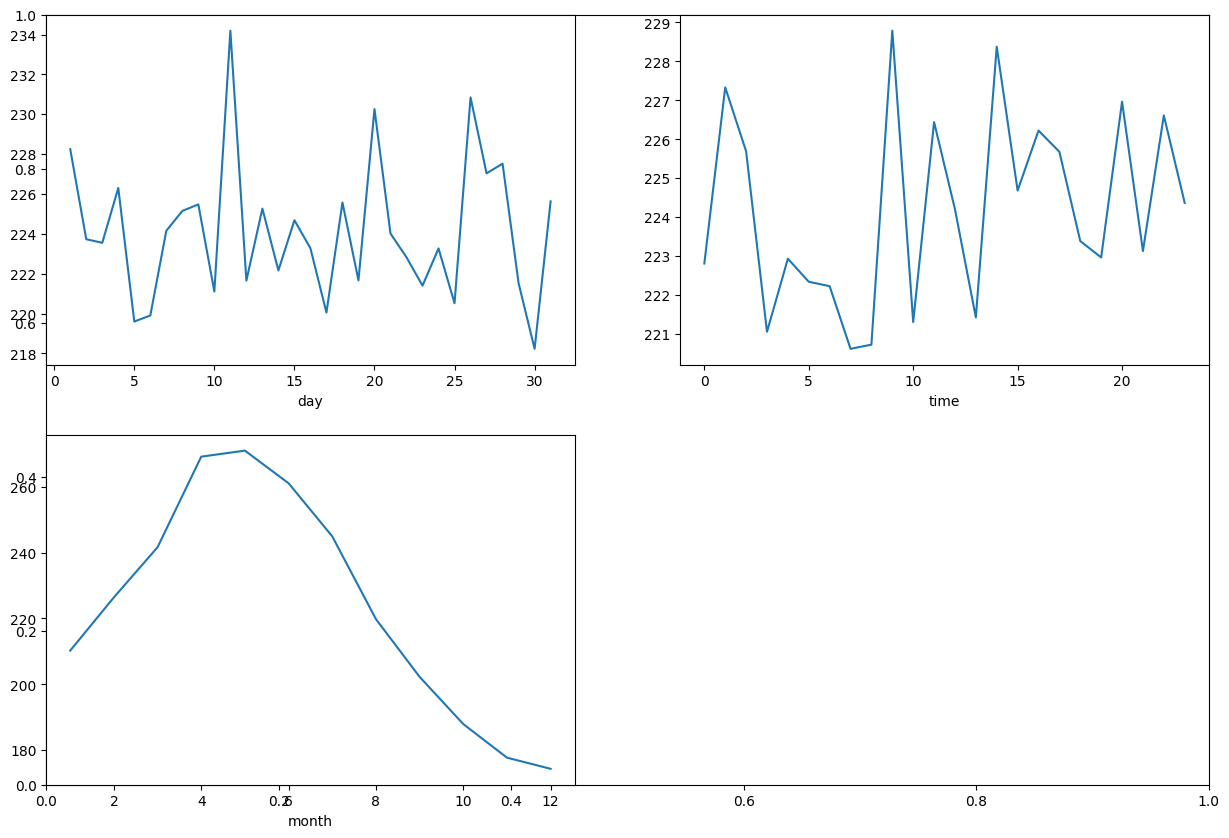

In [14]:
features = ['day', 'time', 'month']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['count'].plot()
plt.show()

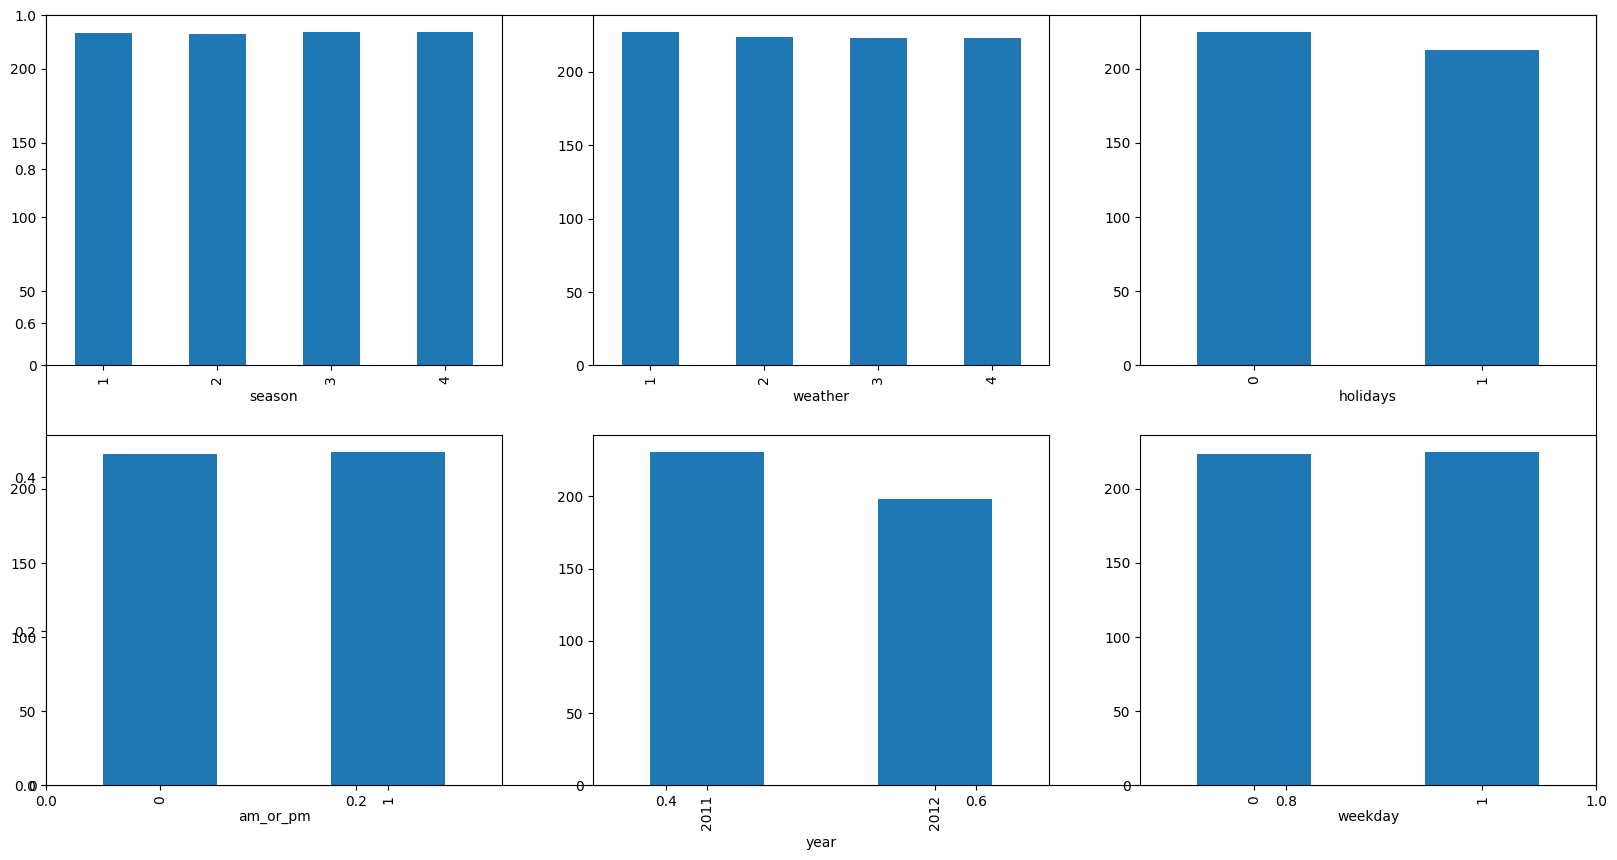

In [15]:
features = ['season', 'weather', 'holidays',\
            'am_or_pm', 'year', 'weekday']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    df.groupby(col).mean()['count'].plot.bar()
plt.show()

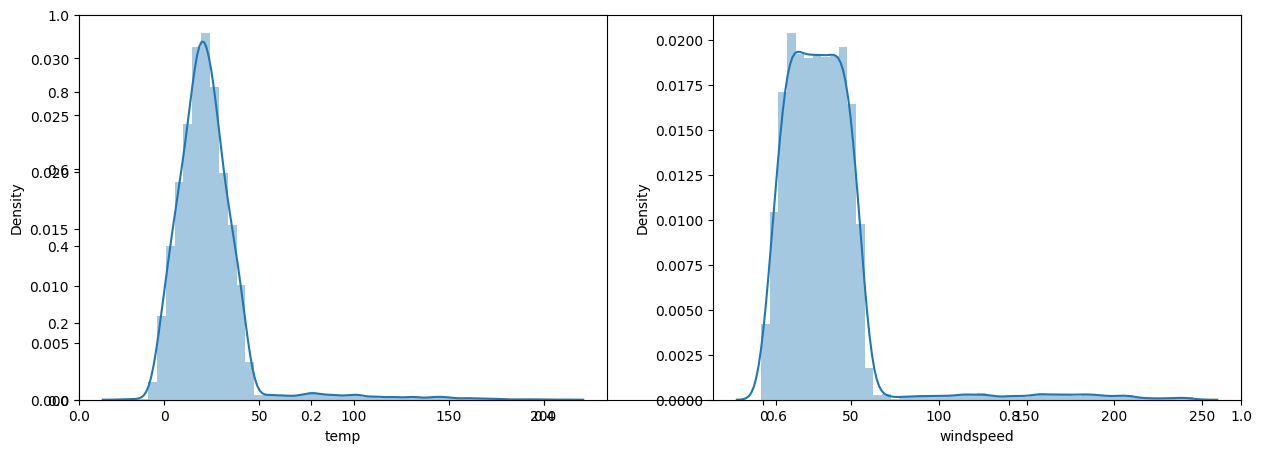

In [16]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sb.distplot(df[col])
plt.show()

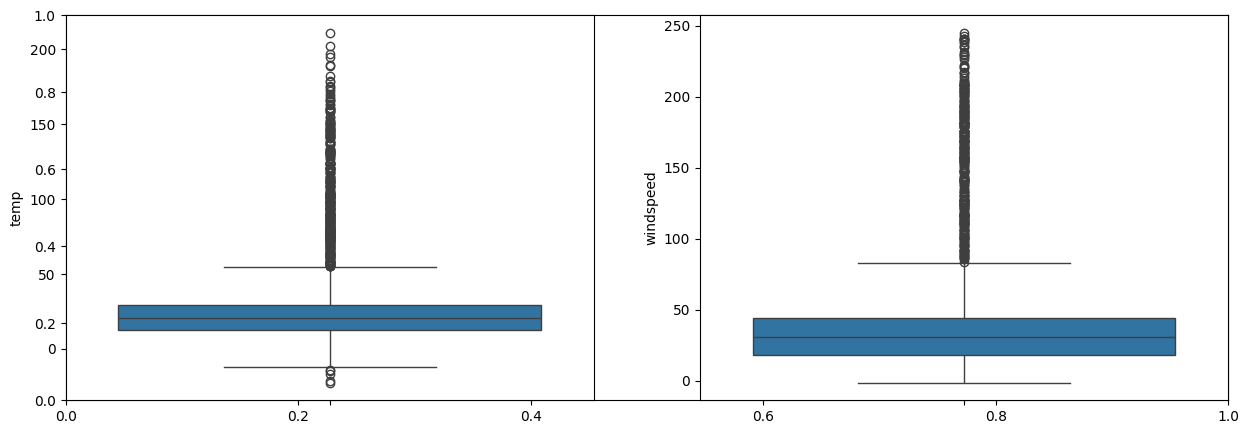

In [17]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sb.boxplot(df[col])
plt.show()

In [18]:
num_rows = df.shape[0] - df[df['windspeed']<32].shape[0]
print(f'Number of rows that will be lost if we remove outliers is equal to {num_rows}.')

Number of rows that will be lost if we remove outliers is equal to 6091.


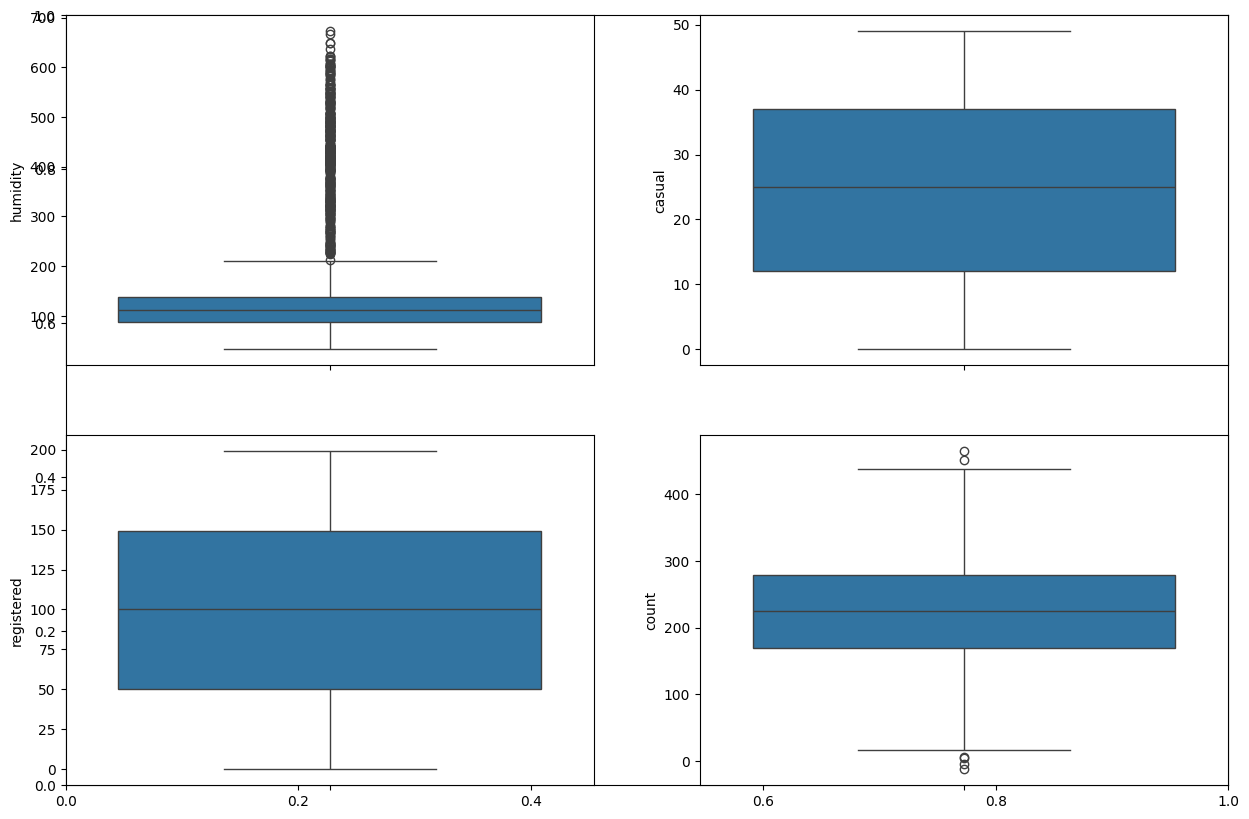

In [19]:
features = ['humidity', 'casual', 'registered', 'count']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sb.boxplot(df[col])
plt.show()

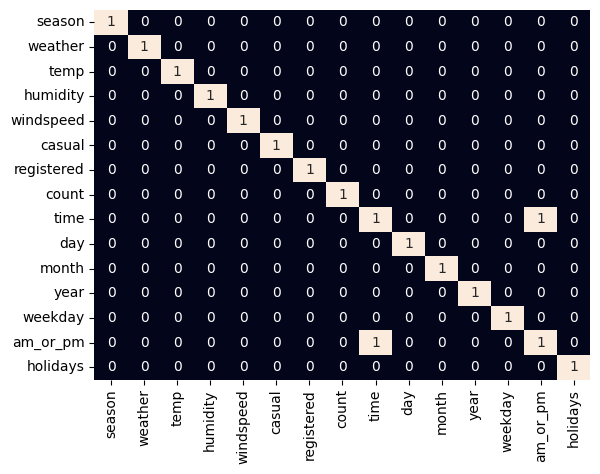

In [20]:
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [21]:
df.drop(['registered', 'time'], axis=1, inplace=True)
df = df[(df['windspeed'] < 32) & (df['humidity'] > 0)]

In [22]:
features = df.drop(['count'], axis=1)
target = df['count'].values

X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size = 0.1,
                                                  random_state=22)
X_train.shape, X_val.shape

((4315, 12), (480, 12))

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [55]:
models = [LinearRegression(), Lasso(), RandomForestRegressor(), Ridge()]

for i in range(len(models)):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} :')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()

LinearRegression() :
Training Error :  55.51892217832468
Validation Error :  55.745841896640314

Lasso() :
Training Error :  55.53694549883355
Validation Error :  55.870723996666

RandomForestRegressor() :
Training Error :  20.676792718043817
Validation Error :  54.85627167687891

Ridge() :
Training Error :  55.518884098595414
Validation Error :  55.74662268167663

